This will be a code where you find the approximate arclength along a parametrized curve under ideal condition 

$ S = \int_{0}^{t} \sqrt{\frac{dx}{dt'}^2 + \frac{dy}{dt'}^2 + \frac{dz}{dt'}^2}  \,dt' $

taking a derivative we get our differnetional equation where S = f(x,y,z) = f(t)

# orginal code below

```python
# Your code here
# based on newtonian mechanics
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # Need to import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
#state is [s,z,vz]

def diff_eqns(t, state, *args):
    g = -9.81 #m/s^2
    s = state[0]
    xo, yo, zo, vx, vy, vz = args
    dsdt = np.sqrt((vx)**2 + (vy)**2 + (g*t + vz)**2)
    return np.array([dsdt])
def ground(t, state, *args):
    g = -9.81
    z = args[5]*t + g*t**2/2
    return args[5]*t + g*t**2/2
ground.terminal = True
ground.direction = -1

#intial conditons [x0, y0, z0, dx0dt, dy0dt, dz0dt]
IC = np.array([0, 0, 0, 0, 0, 10])

# t_span
t0 = 0 #s
tf = 3 #s
tspan = np.array([t0, tf])
times = np.linspace(t0, tf, int(tf-t0)*1000+1)


g = -9.81 #m/s^2
# formulas zf = vz*t + g*t**2/2 +z0 xf = vx*t + x0 yf = vy*t + y0 


s0 = [0]

sol = solve_ivp(diff_eqns, tspan, s0, t_eval = times, args = (IC), events = (ground))

print(sol.t_events)
z = IC[5]*sol.t + g*sol.t**2/2 + IC[2]

x = IC[3]*sol.t + IC[0]

y = IC[4]*sol.t + IC[1]

# Create a 3D plot
fig = plt.figure(figsize=(12, 5))  # You can adjust the figure size as needed
ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, 1st subplot

# Plot the surface
ax1.plot(x, y, z, label='Trajectory')
ax1.scatter(IC[0],IC[1],IC[2], s = 10, color = 'red', label = 'Inital Position')

# Customize the plot (add labels, title, etc.)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('3D Plot of a Surface')
# 2D Subplot
ax2 = fig.add_subplot(122)  # 1 row, 2 columns, 2nd subplot (2D)
ax2.plot(sol.t, sol.y[0], label='2D Plot')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('2D Plot')
ax2.legend()

# Show the subplots
plt.tight_layout()  # Adjust subplot spacing for a better display
plt.show()
```

[20.387359836901123, 1140.7138263007896]


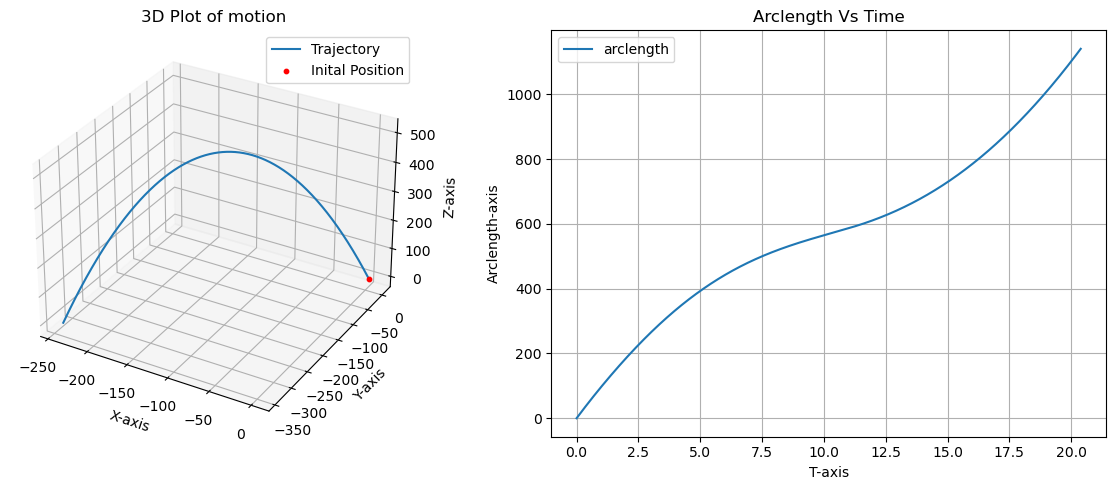

In [1]:
# More code here as needed. Add as many code boxes as you need
# Your code here
# based on newtonian mechanics
# assuming no air resistance
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # Need to import solve_ivp
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module

def arclength_projectile_motion(inital_cond, t_span = [0,30], value = True):
    '''
    input inital conditions [xo, yo, zo, vx, vy, vz] and reutrn arclength along with time it look to hit the ground
    if value = True, if value = False 
    then return a graph of the 3-d motion and the arclength graph, must also enter a span of time in list or array format
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import solve_ivp # Need to import solve_ivp
    from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
    #state is [s,z,vz]

    def diff_eqns(t, state, *args):
        g = -9.81 #m/s^2
        s = state[0]
        xo, yo, zo, vx, vy, vz = args
        dsdt = np.sqrt((vx)**2 + (vy)**2 + (g*t + vz)**2)
        return np.array([dsdt])
    def ground(t, state, *args):
        g = -9.81
        return args[5]*t + g*t**2/2 + args[2]
    ground.terminal = True
    ground.direction = -1

    #intial conditons [x0, y0, z0, dx0dt, dy0dt, dz0dt]
    IC = inital_cond

    # t_span
    t0 = t_span[0] #s
    tf = t_span[1] #s
    tspan = np.array([t0, tf])
    times = np.linspace(t0, tf, int(tf-t0)*2000+1)


    g = -9.81 #m/s^2
    # formulas zf = vz*t + g*t**2/2 +z0 xf = vx*t + x0 yf = vy*t + y0  in meters


    s0 = [0]

    sol = solve_ivp(diff_eqns, tspan, s0, t_eval = times, args = (IC), events = (ground))

    z = IC[5]*sol.t + g*sol.t**2/2 + IC[2]

    x = IC[3]*sol.t + IC[0]

    y = IC[4]*sol.t + IC[1]
    
    if value == True:
        return [sol.t_events[0][0], sol.y[0][-1]]
    else:
        # Create a 3D plot
        fig = plt.figure(figsize=(12, 5))  # You can adjust the figure size as needed
        ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, 1st subplot

        # Plot the surface
        ax1.plot(x, y, z, label='Trajectory')
        ax1.scatter(IC[0],IC[1],IC[2], s = 10, color = 'red', label = 'Inital Position')

        # Customize the plot (add labels, title, etc.)
        ax1.set_xlabel('X-axis')
        ax1.set_ylabel('Y-axis')
        ax1.set_zlabel('Z-axis')
        ax1.set_title('3D Plot of motion')
        ax1.legend()
        # 2D Subplot
        ax2 = fig.add_subplot(122)  # 1 row, 2 columns, 2nd subplot (2D)
        ax2.plot(sol.t, sol.y[0], label='arclength')
        ax2.set_xlabel('T-axis')
        ax2.set_ylabel('Arclength-axis')
        ax2.set_title('Arclength Vs Time')
        ax2.grid(True)
        ax2.legend()

        # Show the subplots
        plt.tight_layout()
        plt.show()
IC = [3, 4, 0, -12, -17, 100]
print(arclength_projectile_motion(IC ,value = True))
arclength_projectile_motion(IC ,value = False)

In [ ]:
def 